## Model

A linear Support Vector Machine implements the linear model
$$y = \text{sign}\left(\boldsymbol{w}^T\boldsymbol{x} + b\right),$$
where $y \in \{-1, 1\}$ is a class label, $\boldsymbol{x} \in \mathbb{R}^D$ is an input vector, and $\boldsymbol{w} \in \mathbb{R}^D$, $b \in \mathbb{R}$ are the model parameters.

## Objective Function

The original objective function for a Support Vector Machine is

$$\min_{\boldsymbol{w}} ||\boldsymbol{w}||^2 \text{ subject to } y_i \left( \boldsymbol{w}^T \boldsymbol{x}_i + b \right) \geq 1 \text{ for } i=1,\ldots,n.$$

To allow missclassification to some degree, we can formulate a relaxed version. The objective function of *soft* margin SVM is

$$\min_{\boldsymbol{w},\xi_i}||\boldsymbol{w}||^2 + C \sum_{i=1}^{n} \xi_i \text{ subject to } y_i \left( \boldsymbol{w}^T \boldsymbol{x}_i + b \right) \geq 1 - \xi_i \text{ and } \xi_i \geq 0 \text{ for } i=1,\ldots,n.$$

We can measure both parts of the objective.

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
def classification_error(y, y_pred):
    return np.mean(np.maximum(0, 1 - y * y_pred))
def regularization(svm):
    return np.linalg.norm(svm.coef_)

## Implementation

A simple SVM implementation can be found at [github](https://github.com/AlexanderFabisch/svm). It is based on Andrej Karpathy's [svm.js](https://github.com/karpathy/svmjs). The main part of a good SVM implementation is the optimization algorithm that is used to minimize the objective. Probably the most widely used library at the moment is [libsvm](https://www.csie.ntu.edu.tw/~cjlin/libsvm/) which is wrapped in [sklearn](http://scikit-learn.org/stable/).

## Regularization

We take a look at a simple dataset. We define a function to compare several values of $C$.

In [3]:
from svm import SVM


def plot_decision_surface(X, y, Cs, plot_sv=False):
    random_state = np.random.RandomState(0)
    plt.figure(figsize=(10, 3))
    for i, C in enumerate(Cs):
        svm = SVM(kernel="linear", C=C, random_state=random_state)
        svm.fit(X, y)

        xx = np.linspace(0, 1)
        a = -svm.coef_[0] / svm.coef_[1]
        yy = a * xx - svm.intercept_ / svm.coef_[1]

        y_pred = svm.decision_function(X)

        plt.subplot(1, len(Cs), 1 + i)
        if plot_sv:
            plt.scatter(svm.support_vectors_[:, 0],
                        svm.support_vectors_[:, 1], c="g", s=100)
        plt.scatter(X[:, 0], X[:, 1], c=y)
        plt.plot(xx, yy, 'k-')
        plt.title("$C = %g$, $l = %.3f C + %.3f$"
                  % (C, classification_error(y, y_pred),
                     regularization(svm)))
        plt.xlim(0, 1)
        plt.ylim(0, 1)
        plt.xticks(())
        plt.yticks(())
    plt.show()

The dataset consists of samples drawn from two Gaussian distributions.

(0, 1)

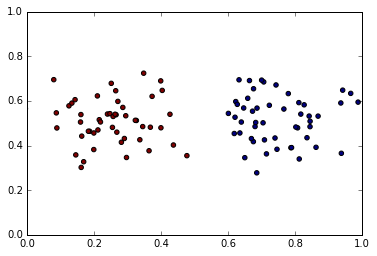

In [4]:
random_state = np.random.RandomState(0)
n_samples = 100
X = np.vstack((0.1 * random_state.randn(n_samples / 2, 2) + np.array([0.25, 0.5]),
               0.1 * random_state.randn(n_samples / 2, 2) + np.array([0.75, 0.5])))
y = np.ones(n_samples)
y[X[:, 0] > 0.5] = -1.0

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlim(0, 1)
plt.ylim(0, 1)

A linear SVM with a low value for C will have a low weight vector norm and a higher classification error. With $C=\infty$ the classification error will have the lowest possible value.

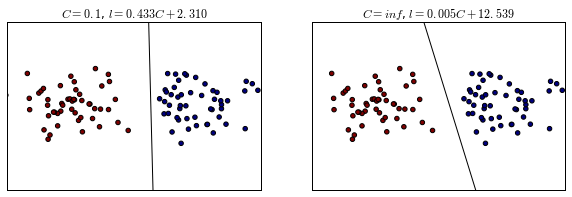

In [5]:
plot_decision_surface(X, y, Cs=[1e-1, np.inf])

In the previous example, a high value of C is not a problem at all because both classes are well separated. Let's take a look at the same dataset with just one more point.

(0, 1)

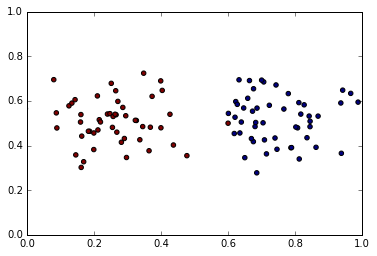

In [6]:
random_state = np.random.RandomState(0)
n_samples = 100
X = np.vstack((0.1 * random_state.randn(n_samples / 2, 2) + np.array([0.25, 0.5]),
               0.1 * random_state.randn(n_samples / 2, 2) + np.array([0.75, 0.5])))
X = np.vstack((X, np.array([[0.6, 0.5]])))
y = np.ones(n_samples + 1)
y[X[:, 0] > 0.5] = -1.0
y[-1] = 1.0

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlim(0, 1)
plt.ylim(0, 1)

High values of C don't work at all in this case.

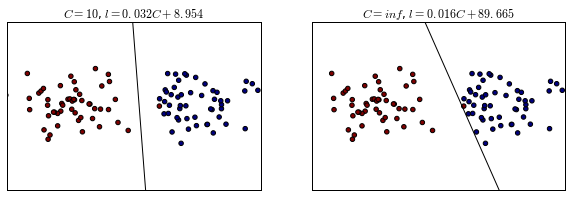

In [7]:
plot_decision_surface(X, y, Cs=[10.0, np.inf])